# Explore here

In [4]:
import pandas as pd
import numpy as np
data = pd.read_csv("../data/raw/personality_dataset.csv")
data_uni = data.drop_duplicates()
data_uni.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


In [5]:
data_uni.describe()

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
count,2451.000000,2451.000000,2447.000000,2437.000000,2449.000000
mean,4.209302,4.219094,3.203923,6.607304,3.831360
std,3.446242,2.909053,2.245668,4.324444,2.949698
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000,1.000000,3.000000,1.000000
50%,3.000000,4.000000,3.000000,6.000000,3.000000
75%,7.000000,7.000000,5.000000,10.000000,6.000000
max,11.000000,10.000000,7.000000,15.000000,10.000000


<Axes: ylabel='Post_frequency'>

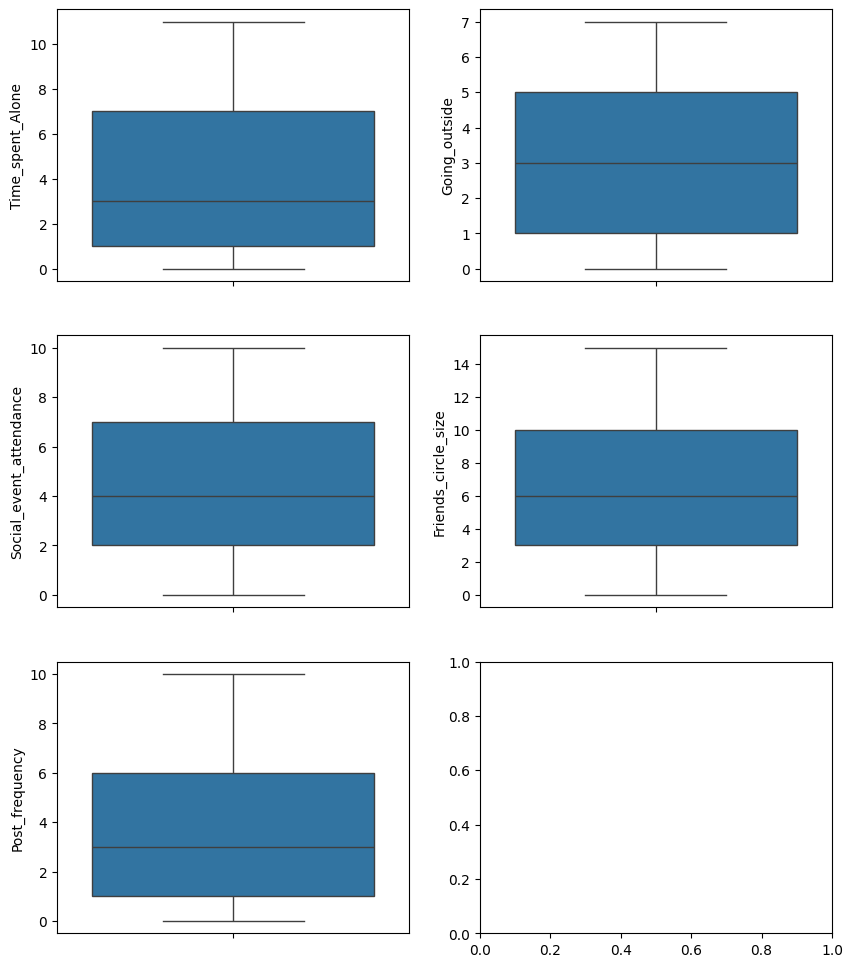

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

fis, axis = plt.subplots(3,2,figsize=(10,12))
sns.boxplot(ax=axis[0,0],data=data_uni["Time_spent_Alone"])
sns.boxplot(ax=axis[1,0],data=data_uni["Social_event_attendance"])
sns.boxplot(ax=axis[0,1],data=data_uni["Going_outside"])
sns.boxplot(ax=axis[1,1],data=data_uni["Friends_circle_size"])
sns.boxplot(ax=axis[2,0],data=data_uni["Post_frequency"])

In [7]:
data_uni["Stage_fear"],uniques_fear = pd.factorize(data_uni["Stage_fear"])
data_uni["Drained_after_socializing"],uniques_drain = pd.factorize(data_uni["Drained_after_socializing"])
data_uni["Personality"],uniques_per = pd.factorize(data_uni["Personality"])
data_uni.head()

/tmp/ipykernel_573/4285498881.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_uni["Stage_fear"],uniques_fear = pd.factorize(data_uni["Stage_fear"])
/tmp/ipykernel_573/4285498881.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_uni["Drained_after_socializing"],uniques_drain = pd.factorize(data_uni["Drained_after_socializing"])
/tmp/ipykernel_573/4285498881.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer]

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,0,4.0,6.0,0,13.0,5.0,0
1,9.0,1,0.0,0.0,1,0.0,3.0,1
2,9.0,1,1.0,2.0,1,5.0,2.0,1
3,0.0,0,6.0,7.0,0,14.0,8.0,0
4,3.0,0,9.0,4.0,0,8.0,5.0,0


In [8]:
from sklearn.preprocessing import StandardScaler
new_data=data_uni.drop(columns=["Personality"])
scaler = StandardScaler()
norm_features = scaler.fit_transform(new_data)
data_scal = pd.DataFrame(norm_features, index = new_data.index,columns=new_data.columns)
data_scal["Personality"] = data_uni["Personality"]

<Axes: >

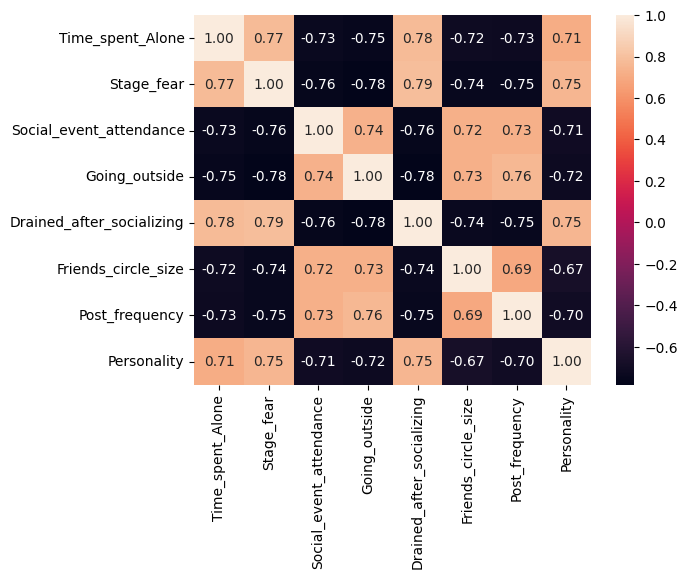

In [9]:
import seaborn as sns
sns.heatmap(data_scal.corr(), annot = True, fmt = ".2f")

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X = data_scal.drop(columns=["Personality"])
Y = data_scal["Personality"]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 8)
model = RandomForestClassifier(random_state=8)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
score = accuracy_score(y_test,y_pred)
print(f"score: {score}")

score: 0.8886679920477137


In [11]:

from sklearn.model_selection import GridSearchCV

hyperparams = {
    "n_estimators":[5,8,10,15,20,25],
    "max_depth": [4,6,8],
    "min_samples_split": [5,8,10,15],
    "min_samples_leaf": [5,8,10,15]
}
grid = GridSearchCV(model, hyperparams, scoring = "accuracy", cv = 10)

grid.fit(x_train, y_train)

print(f"Best hyperparameters: {grid.best_params_}")

Best hyperparameters: {'max_depth': 4, 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 5}


In [12]:
model_opt = RandomForestClassifier(max_depth=4,n_estimators=5,min_samples_leaf=5,min_samples_split=5,random_state=8)
model_opt.fit(x_train,y_train)
y_pred_opt = model_opt.predict(x_test)
score_opt = accuracy_score(y_test,y_pred_opt)
print(f"score optimized: {score_opt}")

score optimized: 0.9204771371769384


In [13]:
import joblib


joblib.dump(model_opt, '../models/modelo_personalidad.pkl')

['../models/modelo_personalidad.pkl']